<a href="https://colab.research.google.com/github/pythontrade/apitesting/blob/master/US_Money_Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import date
import matplotlib.pyplot as plt 

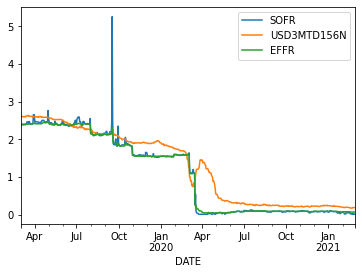

In [33]:
start = date(2019, 3, 1 ) 
end = date(2021, 3, 1)
sofr = pdr.get_data_fred('SOFR', start, end) 
libor3m = pdr.get_data_fred('USD3MTD156N', start, end) 
fedfunds = pdr.get_data_fred('EFFR', start, end) 

df = pd.concat([sofr, libor3m, fedfunds], axis=1)
df.resample('D').last().fillna(method='ffill').plot()

Text(0, 0.5, 'Volume USD Billions')

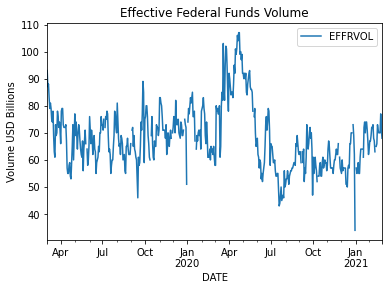

In [32]:
ffvolume = pdr.get_data_fred('EFFRVOL', start, end) 
ax=ffvolume.plot(title='Effective Federal Funds Volume')
ax.set_ylabel('Volume USD Billions')
  

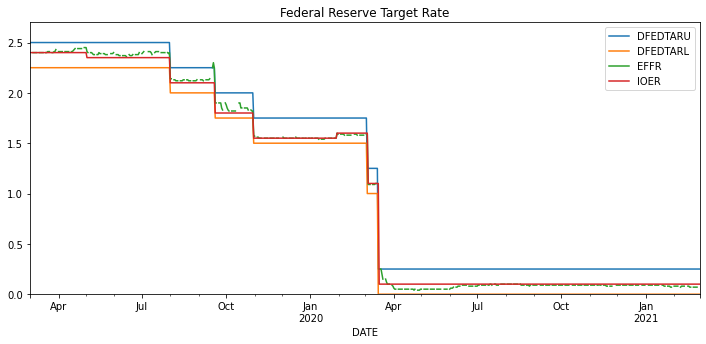

In [50]:
FFUpper = pdr.get_data_fred('DFEDTARU', start, end) 
FFLower = pdr.get_data_fred('DFEDTARL', start, end) 
FFEff = pdr.get_data_fred('EFFR', start, end) 
IOER = pdr.get_data_fred('IOER', start, end)

ax=pd.concat([FFUpper, FFLower, FFEff, IOER], axis=1).plot(title='Federal Reserve Target Rate', figsize=(12,5), ylim=[0,2.7])